In [1]:
# =========================================================
# 0. Kütüphane Yükleme ve Etik Başlangıç
# =========================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Eğer Colab kullanıyorsanız bu satırı ekleyin:
# from google.colab import files
from IPython.display import display

# --- Etik Not: Analiz başlamadan önce, projenin etik kapsamını,
# --- veri gizliliği kurallarını ve paydaş beklentilerini (ASA A, C, D)
# --- onaylayın.
print("✅ Etik Kapsam ve Yetkinlik Onaylandı.")


✅ Etik Kapsam ve Yetkinlik Onaylandı.


In [2]:
# =========================================================
# 1. Veri Yükleme ve İlk Bakış Modülü (COLAB Versiyonu)
# =========================================================

import pandas as pd
from google.colab import files
from IPython.display import display

def load_data_colab_manual():
    """
    Colab ortamında kullanıcıdan manuel olarak dosya yüklemesini ister
    ve yüklenen CSV dosyasını DataFrame olarak döndürür.
    """
    print("📂 Lütfen CSV dosyanızı yükleyin. Yükleme tamamlandığında 'Seçilen dosyalar: ...' mesajı görünecektir.")

    # 1. Yükleme işlemi
    try:
        uploaded = files.upload()
    except Exception as e:
        print(f"❌ HATA: Dosya yükleme arayüzü başlatılamadı: {e}")
        return None

    if not uploaded:
        print("⚠️ Hata: Hiçbir dosya yüklenmedi.")
        return None

    # 2. Yüklenen dosyayı okuma
    file_name = list(uploaded.keys())[0]

    try:
        df = pd.read_csv(file_name)
        print(f"\n✅ '{file_name}' başarıyla yüklendi! Bu dosya ile analiz devam ediyor.")
        print(f"📊 Veri boyutu: {df.shape[0]} satır, {df.shape[1]} sütun")

        # Etik Kontrol: Veri Kaynağı Şeffaflığı
        print("⚠️ Etik Not: Lütfen bu veri setinin kaynağını ve veri kısıtlamalarını belgelediğinizden emin olun (ASA B.1).")

        return df

    except Exception as e:
        print(f"❌ HATA: '{file_name}' dosyası okunurken bir sorun oluştu. CSV formatında olduğundan emin olun. Hata: {e}")
        return None

# --- Örnek Çalıştırma ---
wdicountry_df = load_data_colab_manual()

# Yükleme başarılıysa, DataFrame'in ilk birkaç satırını kontrol edelim.
if wdicountry_df is not None:
    print("\n🔹 Yüklenen Veri Seti İlk 5 Satır:")
    display(wdicountry_df.head())

📂 Lütfen CSV dosyanızı yükleyin. Yükleme tamamlandığında 'Seçilen dosyalar: ...' mesajı görünecektir.


Saving WDICSV.csv to WDICSV.csv

✅ 'WDICSV.csv' başarıyla yüklendi! Bu dosya ile analiz devam ediyor.
📊 Veri boyutu: 403256 satır, 69 sütun
⚠️ Etik Not: Lütfen bu veri setinin kaynağını ve veri kısıtlamalarını belgelediğinizden emin olun (ASA B.1).

🔹 Yüklenen Veri Seti İlk 5 Satır:


Country Name Country Code  \
0  Africa Eastern and Southern          AFE   
1  Africa Eastern and Southern          AFE   
2  Africa Eastern and Southern          AFE   
3  Africa Eastern and Southern          AFE   
4  Africa Eastern and Southern          AFE   

                                      Indicator Name     Indicator Code  1960  \
0  Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   NaN   
1  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.RU.ZS   NaN   
2  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.UR.ZS   NaN   
3            Access to electricity (% of population)     EG.ELC.ACCS.ZS   NaN   
4  Access to electricity, rural (% of rural popul...  EG.ELC.ACCS.RU.ZS   NaN   

   1961  1962  1963  1964  1965  ...       2015       2016       2017  \
0   NaN   NaN   NaN   NaN   NaN  ...  18.001597  18.558234  19.043572   
1   NaN   NaN   NaN   NaN   NaN  ...   7.096003   7.406706   7.666648   
2   NaN   NaN   NaN   NaN   NaN  ...  38.488233  38.779953  39.068462   
3   NaN   NaN   NaN   NaN   NaN  ...  33.922276  38.859598  40.223744   
4   NaN   NaN   NaN   NaN   NaN  ...  16.527554  24.627753  25.432092   

        2018       2019       2020       2021       2022       2023  2024  
0  19.586457  20.192064  20.828814  21.372164  22.100884        NaN   NaN  
1   8.020952   8.403358   8.718306   9.097176   9.473374        NaN   NaN  
2  39.445526  39.818645  40.276374  40.687817  41.211606        NaN   NaN  
3  43.035073  44.390861  46.282371  48.127211  48.801258  50.668330   NaN  
4  27.061929  29.154282  31.022083  32.809138  33.783960  35.375216   NaN  

[5 rows x 69 columns]

In [3]:
# =========================================================
# 2. Genel Özet Modülü (DÜZELTİLMİŞ Hata Önleyici Versiyon)
# =========================================================

def display_summary(df):
    """Veri setinin genel özetini (head, info, describe) gösterir."""
    if df is None: return

    print("\n--- 📊 Veri Özeti ---")
    print("🔹 İlk 5 Satır:")
    display(df.head())

    print("\n🔹 Veri Türleri ve Eksik Değer Sayıları (Genel):")
    df.info()

    # --- HATA ÖNLEYİCİ KONTROL BAŞLANGICI ---
    # Sayısal sütunları seçer
    numerical_df = df.select_dtypes(include=['number'])

    if not numerical_df.empty:
        # Sayısal sütun varsa özet istatistikleri göster
        print("\n🔹 Sayısal Değişkenler İçin Özet İstatistikler:")
        display(numerical_df.describe().T)
        print("💡 Etik Not: describe() çıktısındaki uç değerleri (max/min) kontrol ederek, veri giriş hatalarını veya aykırı değerlerin neden olabileceği potansiyel çarpıklıkları değerlendirin (ASA B.2).")
    else:
        # Sayısal sütun yoksa uygun bir mesaj göster
        print("\n⚠️ Uyarı: Veri setinde hiç sayısal (integer, float) sütun bulunmamaktadır. Sayısal özet atlanmıştır.")
        print("💡 Etik Not: Bu veri seti sadece meta veri (tanımlayıcı bilgi) içeriyor gibi görünüyor. Daha sonraki analiz adımlarında sadece kategorik analiz (sıklık, oranlar) yapmanız gerekecektir.")
    # --- HATA ÖNLEYİCİ KONTROL SONU ---


# --- Örnek Çalıştırma ---
# wdicountry_df'nin yüklendiğini varsayıyoruz.
if 'wdicountry_df' in locals() and wdicountry_df is not None:
    display_summary(wdicountry_df)


--- 📊 Veri Özeti ---
🔹 İlk 5 Satır:


Country Name Country Code  \
0  Africa Eastern and Southern          AFE   
1  Africa Eastern and Southern          AFE   
2  Africa Eastern and Southern          AFE   
3  Africa Eastern and Southern          AFE   
4  Africa Eastern and Southern          AFE   

                                      Indicator Name     Indicator Code  1960  \
0  Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   NaN   
1  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.RU.ZS   NaN   
2  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.UR.ZS   NaN   
3            Access to electricity (% of population)     EG.ELC.ACCS.ZS   NaN   
4  Access to electricity, rural (% of rural popul...  EG.ELC.ACCS.RU.ZS   NaN   

   1961  1962  1963  1964  1965  ...       2015       2016       2017  \
0   NaN   NaN   NaN   NaN   NaN  ...  18.001597  18.558234  19.043572   
1   NaN   NaN   NaN   NaN   NaN  ...   7.096003   7.406706   7.666648   
2   NaN   NaN   NaN   NaN   NaN  ...  38.488233  38.779953  39.068462   
3   NaN   NaN   NaN   NaN   NaN  ...  33.922276  38.859598  40.223744   
4   NaN   NaN   NaN   NaN   NaN  ...  16.527554  24.627753  25.432092   

        2018       2019       2020       2021       2022       2023  2024  
0  19.586457  20.192064  20.828814  21.372164  22.100884        NaN   NaN  
1   8.020952   8.403358   8.718306   9.097176   9.473374        NaN   NaN  
2  39.445526  39.818645  40.276374  40.687817  41.211606        NaN   NaN  
3  43.035073  44.390861  46.282371  48.127211  48.801258  50.668330   NaN  
4  27.061929  29.154282  31.022083  32.809138  33.783960  35.375216   NaN  

[5 rows x 69 columns]


🔹 Veri Türleri ve Eksik Değer Sayıları (Genel):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403256 entries, 0 to 403255
Data columns (total 69 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    403256 non-null  object 
 1   Country Code    403256 non-null  object 
 2   Indicator Name  403256 non-null  object 
 3   Indicator Code  403256 non-null  object 
 4   1960            37914 non-null   float64
 5   1961            43031 non-null   float64
 6   1962            44316 non-null   float64
 7   1963            45250 non-null   float64
 8   1964            45752 non-null   float64
 9   1965            47835 non-null   float64
 10  1966            47863 non-null   float64
 11  1967            48514 non-null   float64
 12  1968            49128 non-null   float64
 13  1969            49910 non-null   float64
 14  1970            73512 non-null   float64
 15  1971            78460 non-null   float64
 16  1972   

count          mean           std           min       25%        50%  \
1960   37914.0  4.392593e+11  1.932552e+13 -2.594795e+14  4.505622  38.030328   
1961   43031.0  4.136624e+11  1.962435e+13 -3.243188e+14  4.519140  37.779894   
1962   44316.0  4.255232e+11  2.063978e+13 -3.675279e+14  4.586937  36.595158   
1963   45250.0  4.354661e+11  2.168625e+13 -4.061755e+14  4.670582  36.323728   
1964   45752.0  4.642748e+11  2.319515e+13 -4.462457e+14  4.743431  37.149618   
...        ...           ...           ...           ...       ...        ...   
2020  216884.0  3.809388e+14  1.748931e+17 -2.023638e+15  4.634812  36.583421   
2021  212951.0  2.032319e+15  9.345909e+17 -8.595719e+14  5.569712  39.100000   
2022  192514.0  1.602908e+16  7.028473e+18 -9.091425e+14  5.514604  40.561312   
2023  150169.0  7.287757e+16  2.823499e+19 -5.403951e+15  5.127633  35.481852   
2024   72253.0  3.879979e+13  2.083524e+15 -7.764527e+15  6.277985  43.427424   

               75%           max  
1960  1.000000e+05  1.629367e+15  
1961  8.000000e+04  1.798673e+15  
1962  7.079750e+04  1.940935e+15  
1963  7.095150e+04  2.077617e+15  
1964  8.262300e+04  2.253700e+15  
...            ...           ...  
2020  8.968819e+03  8.144900e+19  
2021  9.402490e+03  4.312820e+20  
2022  1.564450e+04  3.083842e+21  
2023  1.407600e+04  1.094152e+22  
2024  1.142235e+08  2.046172e+17  

[65 rows x 8 columns]

💡 Etik Not: describe() çıktısındaki uç değerleri (max/min) kontrol ederek, veri giriş hatalarını veya aykırı değerlerin neden olabileceği potansiyel çarpıklıkları değerlendirin (ASA B.2).



--- 3. Adım: Eksik Değer Kontrolü ---


/tmp/ipython-input-1476652846.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index, y=missing_data.values, palette="viridis")


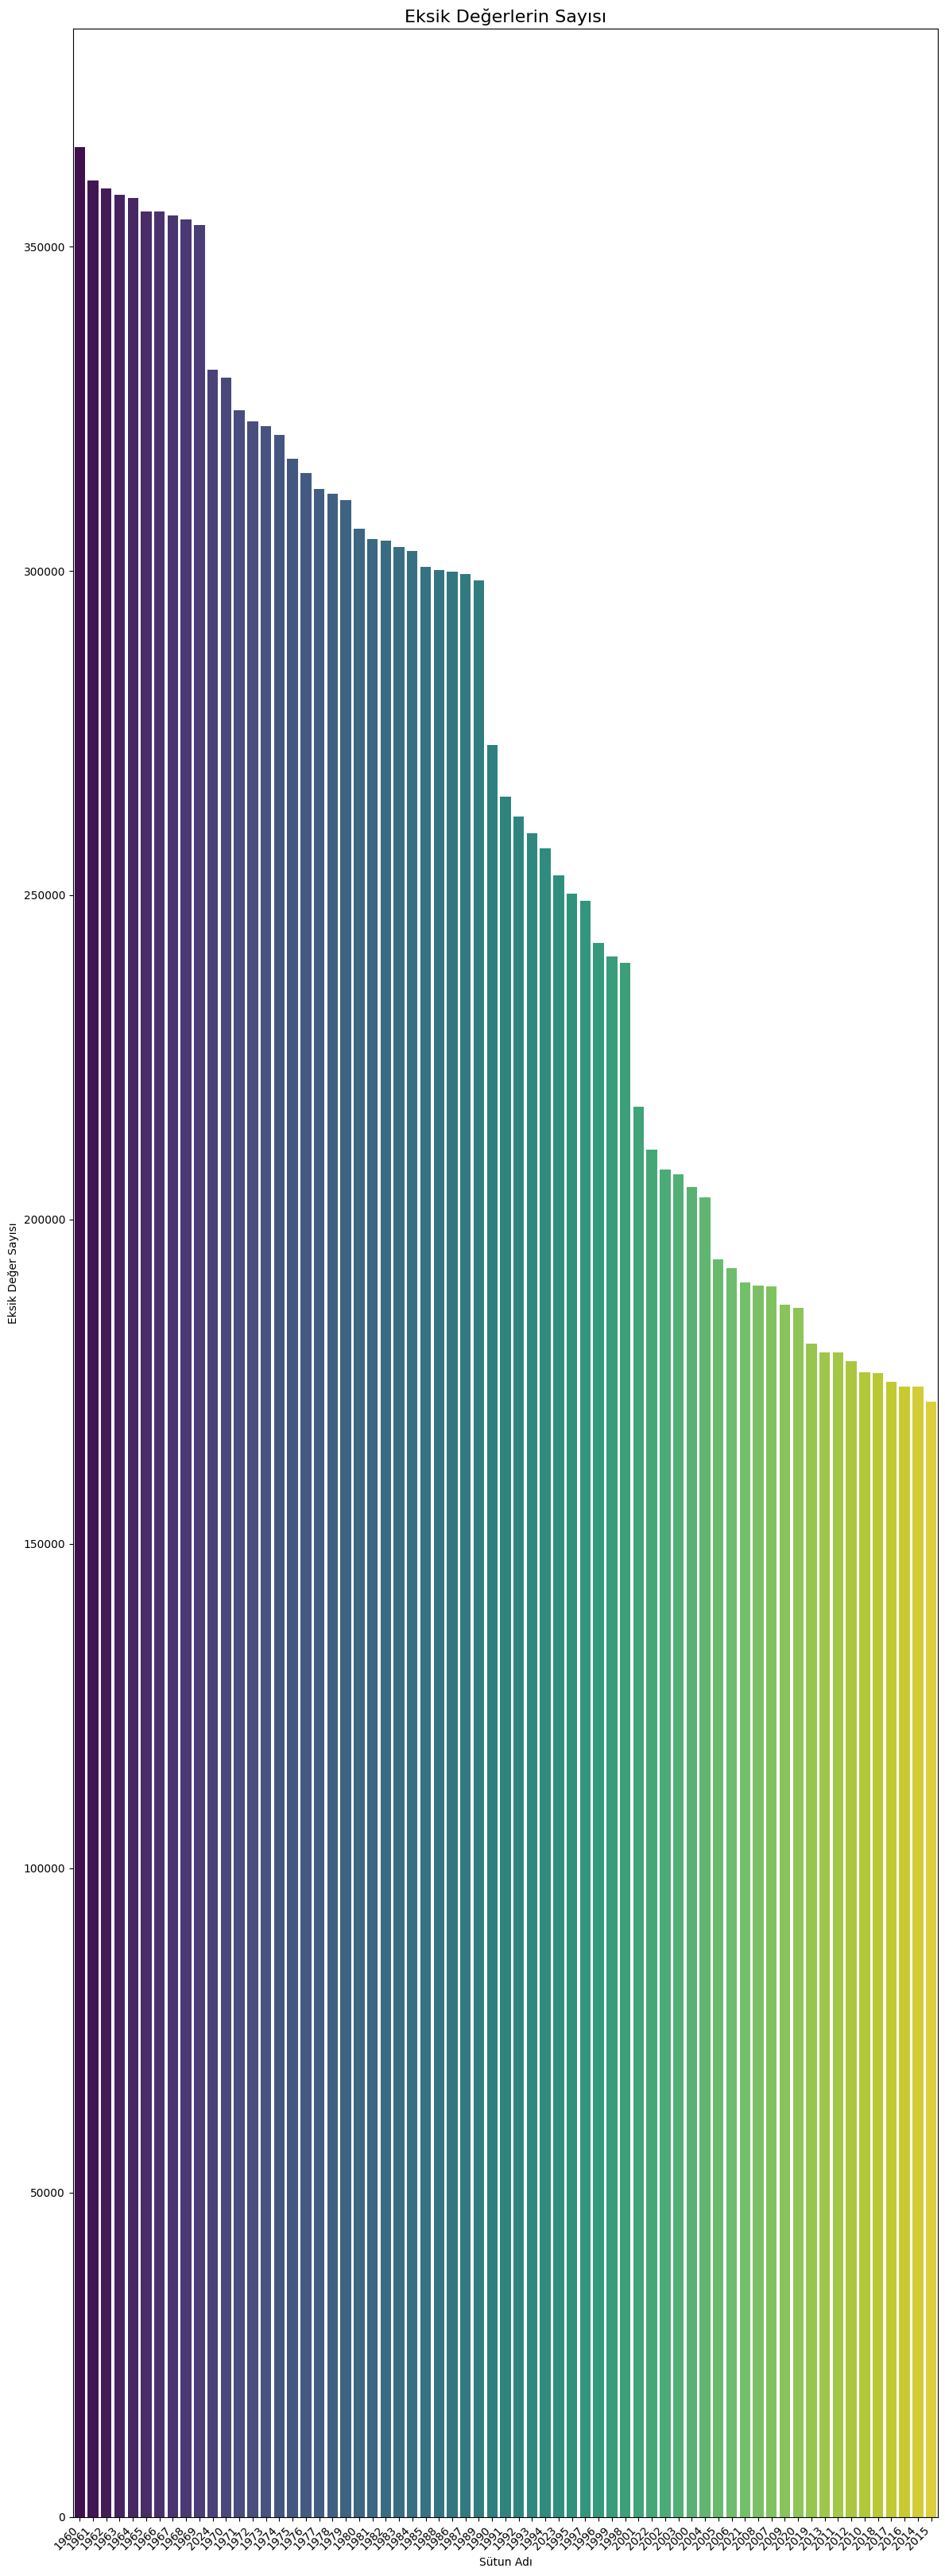

🚨 Etik Not: Yüksek oranda eksik veriye sahip sütunlar için uygulayacağınız (silme, doldurma) yöntemini ve bunun sonuçları nasıl etkileyeceğini raporunuzda belirtmeyi unutmayın (ASA B.1, B.2).


In [4]:
# =========================================================
# 3. Eksik Veri Analizi Modülü
# =========================================================

def plot_missing_data(df):
    """Eksik değerlerin sayısını bar grafiği ile görselleştirir."""
    if df is None: return

    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

    if missing_data.empty:
        print("✅ Veri setinde eksik değer bulunmamaktadır. Grafik atlandı.")
        return

    plt.figure(figsize=(12, max(6, len(missing_data) * 0.5)))
    sns.barplot(x=missing_data.index, y=missing_data.values, palette="viridis")
    plt.title('Eksik Değerlerin Sayısı', fontsize=16)
    plt.xlabel('Sütun Adı')
    plt.ylabel('Eksik Değer Sayısı')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Etik Kontrol: Eksik Veri İşleme
    print("🚨 Etik Not: Yüksek oranda eksik veriye sahip sütunlar için uygulayacağınız (silme, doldurma) yöntemini ve bunun sonuçları nasıl etkileyeceğini raporunuzda belirtmeyi unutmayın (ASA B.1, B.2).")

# --- Örnek Çalıştırma ---
if 'wdicountry_df' in locals() and wdicountry_df is not None:
    print("\n--- 3. Adım: Eksik Değer Kontrolü ---")
    plot_missing_data(wdicountry_df)


--- Kategorik Dağılım Analizi (Otomatik) ---


/tmp/ipython-input-2146630678.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="rocket")


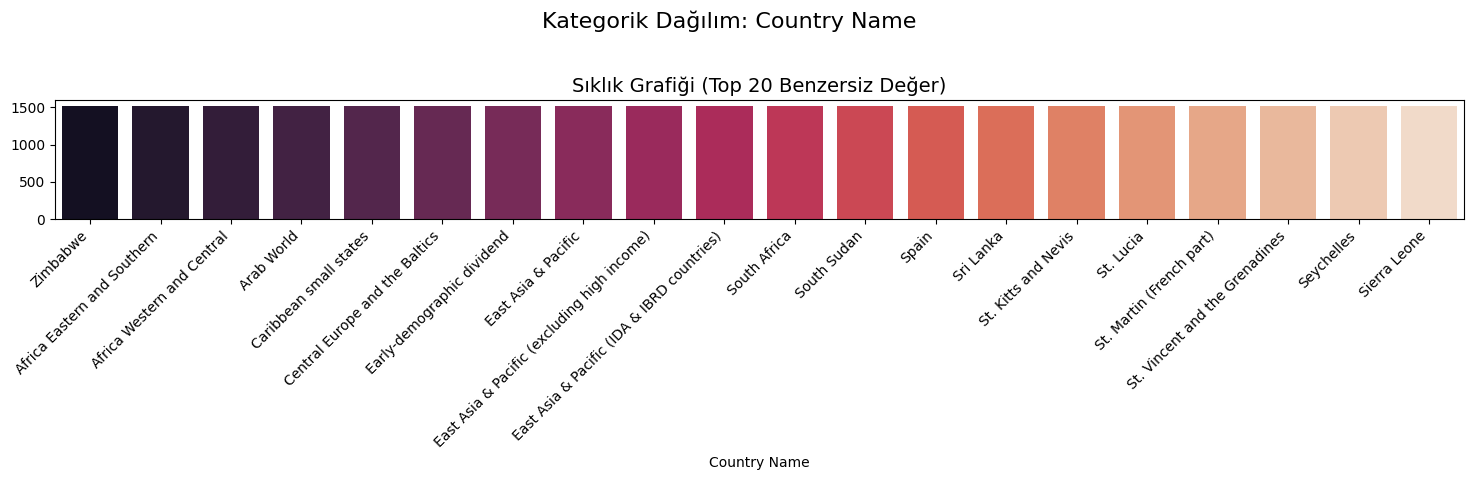

💡 Etik Not: 'Country Name' değişkenindeki dağılımı inceleyerek, farklı gruplar veya bölgeler arasındaki olası eşitsizlikleri göz önünde bulundurun.



/tmp/ipython-input-2146630678.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="rocket")


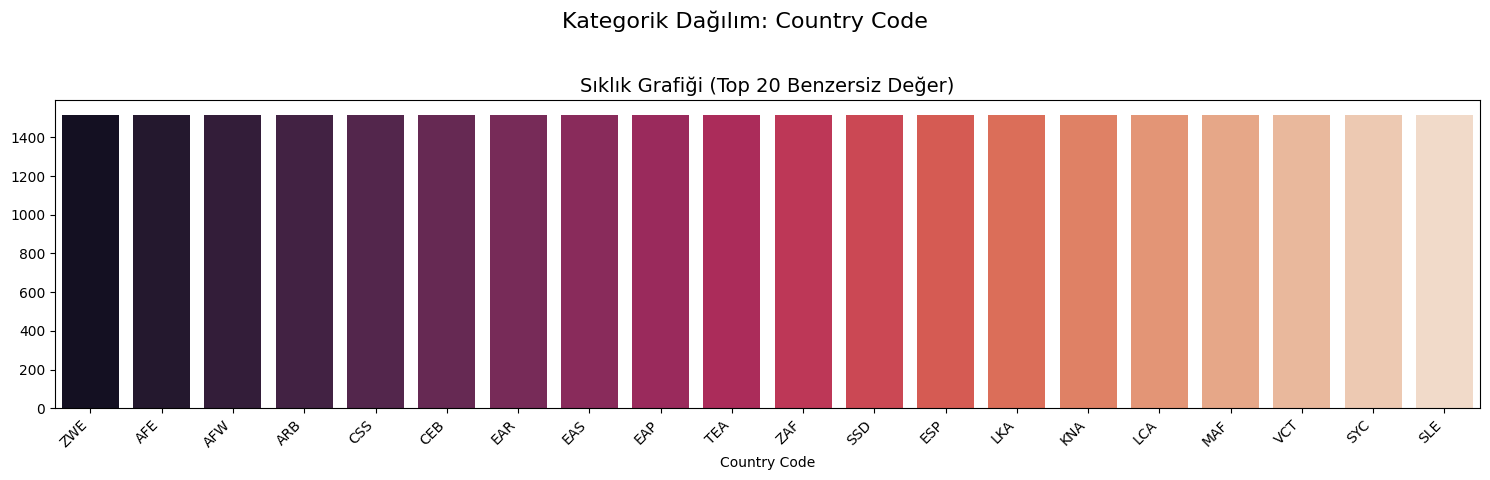

💡 Etik Not: 'Country Code' değişkenindeki dağılımı inceleyerek, farklı gruplar veya bölgeler arasındaki olası eşitsizlikleri göz önünde bulundurun.



/tmp/ipython-input-2146630678.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="rocket")
/tmp/ipython-input-2146630678.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


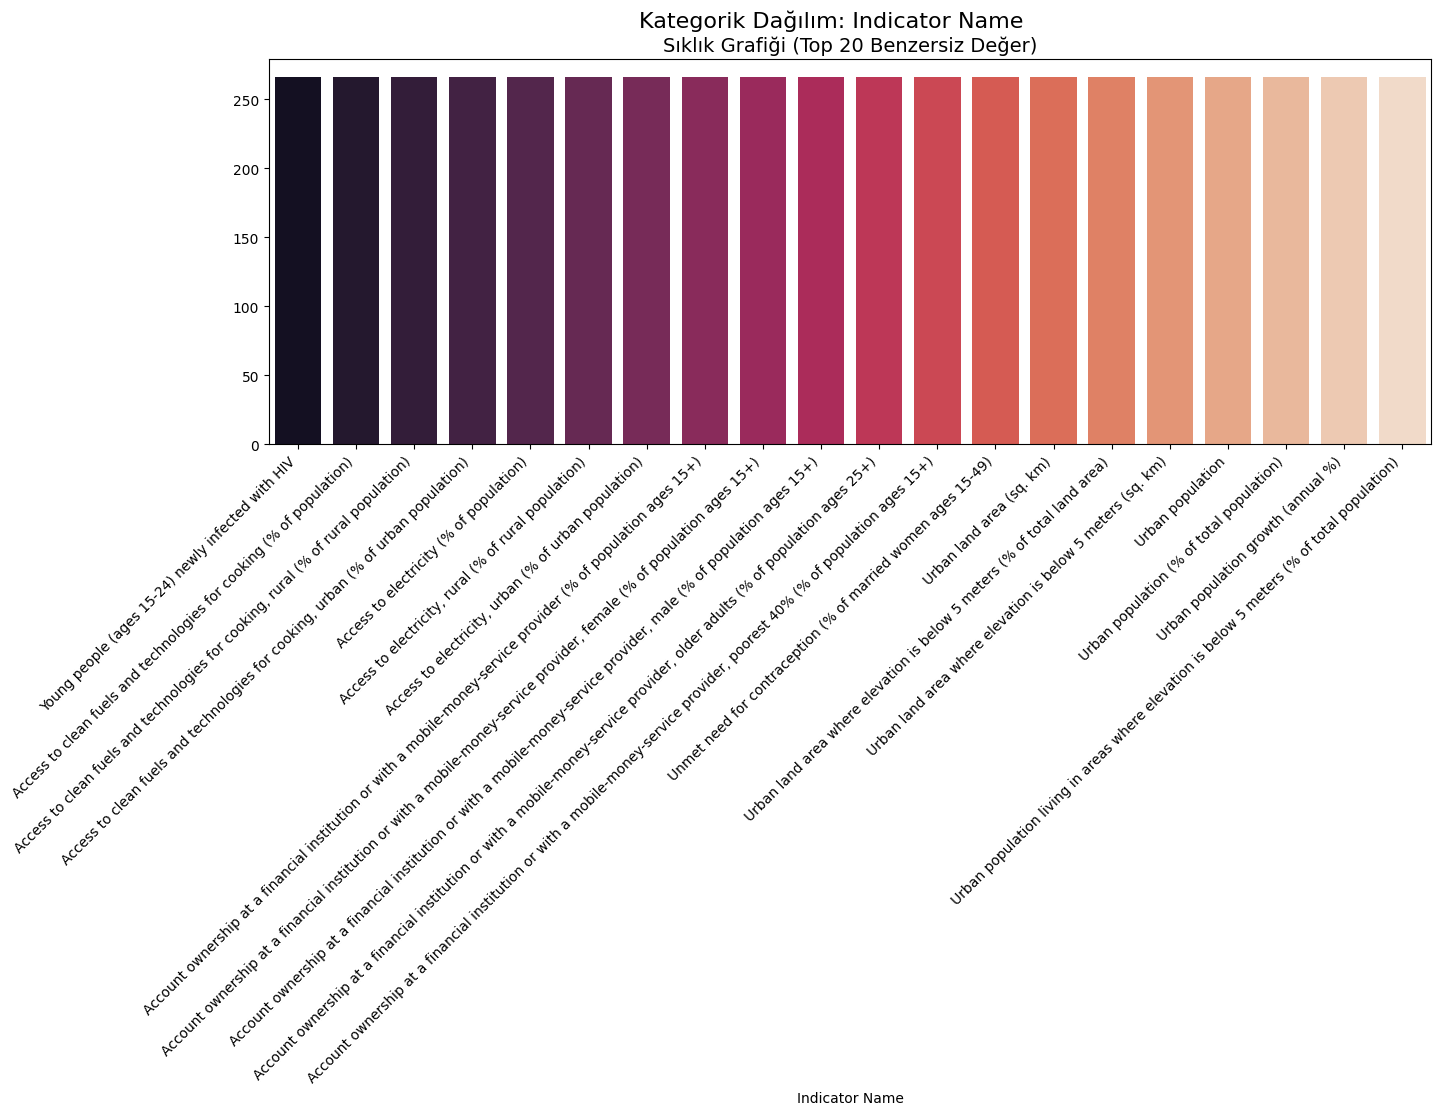

💡 Etik Not: 'Indicator Name' değişkenindeki dağılımı inceleyerek, farklı gruplar veya bölgeler arasındaki olası eşitsizlikleri göz önünde bulundurun.



/tmp/ipython-input-2146630678.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="rocket")


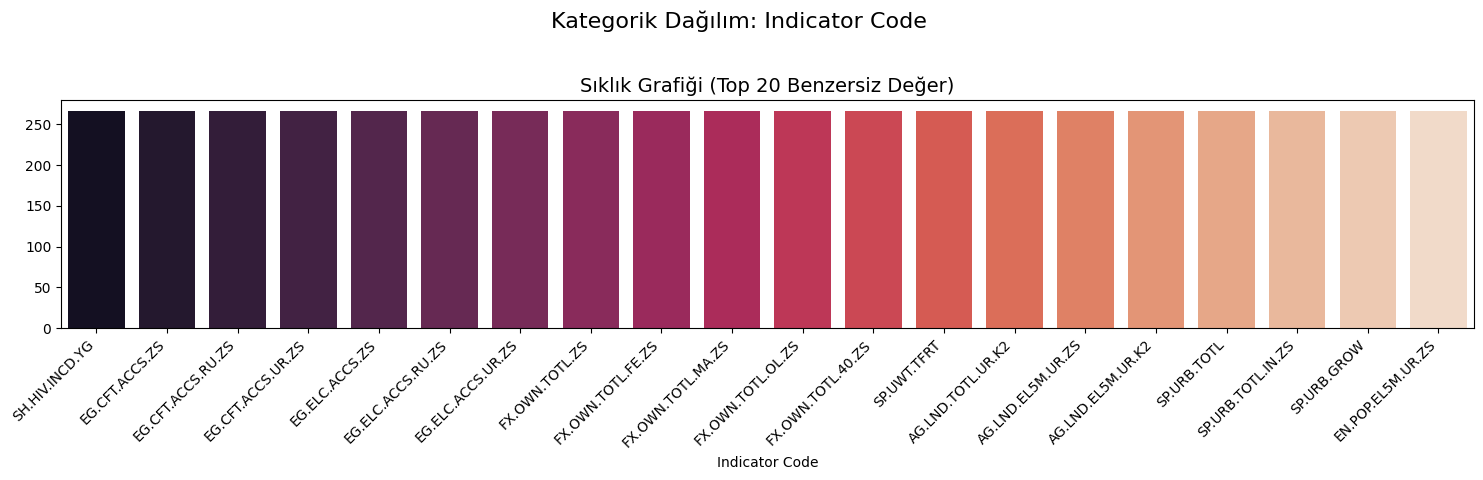

💡 Etik Not: 'Indicator Code' değişkenindeki dağılımı inceleyerek, farklı gruplar veya bölgeler arasındaki olası eşitsizlikleri göz önünde bulundurun.



In [7]:
# =========================================================
# 4. Tek Değişkenli Dağılım Modülü (Kategorik Odaklı)
# =========================================================

import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_distributions(df):
    """
    Veri setindeki tüm kategorik sütunların dağılımını görselleştirir.
    """
    if df is None:
        print("❌ HATA: Veri seti boş.")
        return

    # Kategorik sütunları otomatik algıla (object tipindeki sütunlar)
    categorical_columns = df.select_dtypes(include='object').columns.tolist()

    if not categorical_columns:
        print("⚠️ Uyarı: Veri setinde kategorik sütun bulunamadı.")
        return

    for column in categorical_columns:
        plt.figure(figsize=(15, 5))
        plt.suptitle(f"Kategorik Dağılım: {column}", fontsize=16)

        # En çok tekrar eden 20 değeri al
        value_counts = df[column].value_counts().nlargest(20)

        if len(value_counts) < len(df[column].unique()):
            plot_title = f'Sıklık Grafiği (Top {len(value_counts)} Benzersiz Değer)'
        else:
            plot_title = 'Sıklık Grafiği'

        sns.barplot(x=value_counts.index, y=value_counts.values, palette="rocket")
        plt.title(plot_title, fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

        # Etik kontrol uyarısı
        print(f"💡 Etik Not: '{column}' değişkenindeki dağılımı inceleyerek, farklı gruplar veya bölgeler arasındaki olası eşitsizlikleri göz önünde bulundurun.\n")

# --- Örnek Çalıştırma ---
if 'wdicountry_df' in locals() and wdicountry_df is not None:
    print("\n--- Kategorik Dağılım Analizi (Otomatik) ---")
    plot_categorical_distributions(wdicountry_df)



--- Çapraz Tablo Analizi: Country Code vs Indicator Code ---


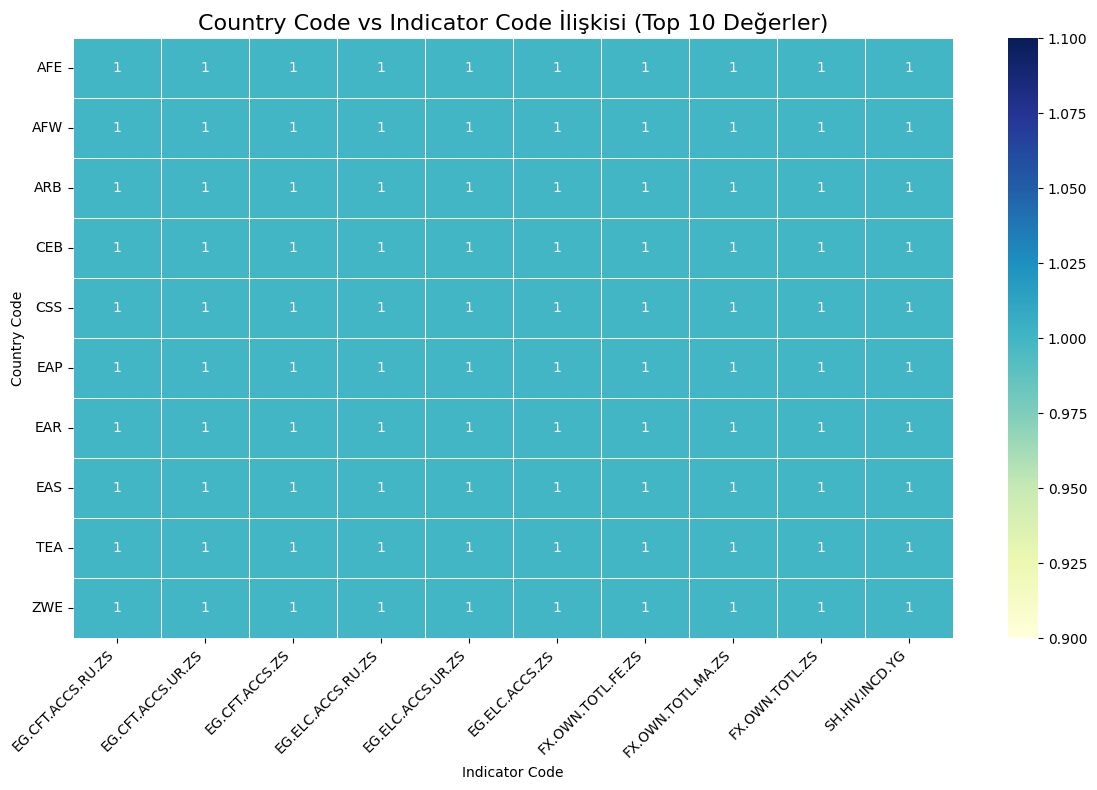

💡 Etik Not: Bu çapraz tablonun yapısını, sadece en sık geçen değerlerin bir alt kümesiyle oluşturulduğu gerçeğini paydaşlara açıklayın. Bu filtrelemenin sonuçları nasıl etkilediği konusunda şeffaf olun (ASA B.2).


In [8]:
# =========================================================
# 5. Kategorik İlişkiler Analizi Modülü (Crosstab)
# =========================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_categorical_relationships(df, row_col, col_col, normalize=False, top_n=10):
    """
    İki kategorik sütun arasındaki ilişkiyi bir çapraz tablo (crosstab) ve ısı haritası ile analiz eder.
    Çok fazla benzersiz değer varsa, sadece en çok tekrar eden 'top_n' değerlerini kullanır.
    """
    if df is None:
        print("❌ HATA: Veri seti boş.")
        return

    # Hata Kontrolü: Sütunların varlığını kontrol etme
    if row_col not in df.columns or col_col not in df.columns:
        print(f"❌ HATA: '{row_col}' veya '{col_col}' sütunları veri setinde bulunamadı.")
        return

    print(f"\n--- Çapraz Tablo Analizi: {row_col} vs {col_col} ---")

    # Çok fazla benzersiz değeri sınırlandırmak için en sık geçenleri bul
    top_rows = df[row_col].value_counts().nlargest(top_n).index
    top_cols = df[col_col].value_counts().nlargest(top_n).index

    # Sadece en sık geçen değerleri içeren alt kümeyi oluştur
    df_filtered = df[df[row_col].isin(top_rows) & df[col_col].isin(top_cols)]

    # Çapraz tabloyu oluştur
    cross_tab = pd.crosstab(df_filtered[row_col], df_filtered[col_col], normalize=normalize)

    if cross_tab.empty:
        print("⚠️ Uyarı: Filtrelemeden sonra (Top N değerler) çapraz tablo oluşturulamadı. 'top_n' değerini artırmayı deneyin.")
        return

    # Isı Haritası Görselleştirme
    plt.figure(figsize=(max(12, len(top_cols) * 0.8), max(8, len(top_rows) * 0.5)))
    sns.heatmap(cross_tab, annot=True, fmt=".0f" if not normalize else ".2%", cmap='YlGnBu', linewidths=.5, cbar=True)
    plt.title(f'{row_col} vs {col_col} İlişkisi (Top {top_n} Değerler)', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Etik Kontrol: Şeffaflık
    print("💡 Etik Not: Bu çapraz tablonun yapısını, sadece en sık geçen değerlerin bir alt kümesiyle oluşturulduğu gerçeğini paydaşlara açıklayın. Bu filtrelemenin sonuçları nasıl etkilediği konusunda şeffaf olun (ASA B.2).")


# --- Örnek Çalıştırma ---
if 'wdicountry_df' in locals() and wdicountry_df is not None:
    # Country Code ve Indicator Code arasındaki ilişki
    analyze_categorical_relationships(
        wdicountry_df,
        row_col='Country Code',
        col_col='Indicator Code',
        top_n=10,   # En çok tekrar eden 10 ülke ve 10 göstergeyi al
        normalize=False  # Sıklık (sayı) göster
    )


In [1]:
# =========================================================
# 6. Sonuçların Etik Raporlanması ve Sınırlamalar (Güncel)
# =========================================================

print("\n--- 6. Adım: Nihai Etik Raporlama ve Sınırlamalar ---")
print("\nBu aşamada, Adım 1'den Adım 5'e kadar elde edilen tüm görsel ve sayısal bulgular "
      "(veri özetleri, eksik değer kontrolü, dağılım grafikleri, çapraz tablolar) yorumlanarak "
      "aşağıdaki etik standartlara uygun bir rapor oluşturulmalıdır:")

print("\n* 🔹 BULGULARIN ÖZETİ (ASA B.2):")
print("  - Veri seti 403.256 satır ve 69 sütun içermektedir; Country Name, Country Code, "
      "Indicator Name ve Indicator Code kategorik değişkenlerdir.")
print("  - 1960-2024 yılları arasındaki sütunlar sayısal verileri içermektedir; eksik veri oranı yüksek "
      "ve yıllar arasında farklılık göstermektedir.")
print("  - Kategorik değişkenlerin dağılımları incelenmiş; farklı ülkeler, göstergeler ve kodlar arasındaki "
      "yoğunluk ve varyasyon gözlemlenmiştir.")
print("  - describe() çıktısındaki uç değerler (max/min) kontrol edilerek veri giriş hataları veya aykırı değerler "
      "değerlendirilmelidir.")

print("\n* 🔹 ETİK İFŞAAT (ASA C.4):")
print("  - Veri setindeki sayısal sütunlarda eksik değerler çok fazladır; bu eksiklikler analiz derinliğini kısıtlamaktadır.")
print("  - Kategorik sütunlarda eksik değer bulunmamaktadır.")
print("  - Eksik verilerin silinmesi veya doldurulması durumunda, analiz sonuçlarının nasıl etkileneceği raporlanmalıdır (ASA B.1, B.2).")
print("  - Veri setinin kaynağı ve sınırlamaları belgelenmelidir (ASA B.1).")

print("\n* 🔹 KAPSAM BEYANI (ASA B.2):")
print("  - Kategorik dağılım analizlerinde Top N filtresi kullanılmıştır; nadir görülen kategoriler analiz dışında bırakılmıştır.")
print("  - Bu filtreleme, elde edilen dağılım ve ilişki tablolarının yalnızca sık görülen değerler için geçerli olmasını sağlar.")
print("  - Paydaşlara, filtreleme nedeniyle tüm veri seti genellemesi yapılamayacağı açıkça belirtilmelidir.")

print("\n💡 Not: Bu adım manuel yorum ve raporlama gerektirir; otomatik olarak üretilen görseller ve tablolar yalnızca rehber niteliğindedir. "
      "Paydaşlarla paylaşmadan önce etik ve metodolojik değerlendirmeyi tamamlayın.")



--- 6. Adım: Nihai Etik Raporlama ve Sınırlamalar ---

Bu aşamada, Adım 1'den Adım 5'e kadar elde edilen tüm görsel ve sayısal bulgular (veri özetleri, eksik değer kontrolü, dağılım grafikleri, çapraz tablolar) yorumlanarak aşağıdaki etik standartlara uygun bir rapor oluşturulmalıdır:

* 🔹 BULGULARIN ÖZETİ (ASA B.2):
  - Veri seti 403.256 satır ve 69 sütun içermektedir; Country Name, Country Code, Indicator Name ve Indicator Code kategorik değişkenlerdir.
  - 1960-2024 yılları arasındaki sütunlar sayısal verileri içermektedir; eksik veri oranı yüksek ve yıllar arasında farklılık göstermektedir.
  - Kategorik değişkenlerin dağılımları incelenmiş; farklı ülkeler, göstergeler ve kodlar arasındaki yoğunluk ve varyasyon gözlemlenmiştir.
  - describe() çıktısındaki uç değerler (max/min) kontrol edilerek veri giriş hataları veya aykırı değerler değerlendirilmelidir.

* 🔹 ETİK İFŞAAT (ASA C.4):
  - Veri setindeki sayısal sütunlarda eksik değerler çok fazladır; bu eksiklikler analiz derinliğin